<a href="https://colab.research.google.com/github/Tanvir4247/Advanced-DAE-on-Suicide-Data/blob/main/Advanced_DAE_on_Suicide_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Cleaning the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Analysis Project 2025/EDA Suicide/master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
for col in df.columns:
    print(col)

country
year
sex
age
suicides_no
population
suicides/100k pop
country-year
HDI for year
 gdp_for_year ($) 
gdp_per_capita ($)
generation


In [ ]:
df.columns = df.columns.str.strip()
df = df.drop(df.columns[7], axis=1)


In [ ]:
for col in df.columns:
    print(col)

country
year
sex
age
suicides_no
population
suicides/100k pop
HDI for year
gdp_for_year ($)
gdp_per_capita ($)
generation


In [ ]:
len(df)

27820

In [ ]:
df.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

## Number of suicides committed in each country

In [ ]:
type(df['suicides_no'][0])

numpy.int64

In [ ]:
df['suicides_no'] = pd.to_numeric(df['suicides_no'], errors='coerce')


In [ ]:
country_suicide_series = df.groupby('country')['suicides_no'].sum()
print(country_suicide_series.head(10))


country
Albania                 1970
Antigua and Barbuda       11
Argentina              82219
Armenia                 1905
Aruba                    101
Australia              70111
Austria                50073
Azerbaijan              1656
Bahamas                   93
Bahrain                  463
Name: suicides_no, dtype: int64


In [ ]:
suicide_in_countries = df.groupby('country')

In [ ]:
suicide_in_countries.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27556,Uzbekistan,1990,male,35-54 years,343,1491700,22.99,NaN,"13,360,607,918",778,Silent
27557,Uzbekistan,1990,male,55-74 years,129,660200,19.54,NaN,"13,360,607,918",778,G.I. Generation
27558,Uzbekistan,1990,male,25-34 years,283,1638100,17.28,NaN,"13,360,607,918",778,Boomers
27559,Uzbekistan,1990,male,75+ years,20,118300,16.91,NaN,"13,360,607,918",778,G.I. Generation


In [ ]:
country_suicide_series = suicide_in_countries['suicides_no'].sum()

In [ ]:
country_suicide_series.head(10)


,suicides_no
country,
Albania,1970
Antigua and Barbuda,11
Argentina,82219
Armenia,1905
Aruba,101
Australia,70111
Austria,50073
Azerbaijan,1656
Bahamas,93


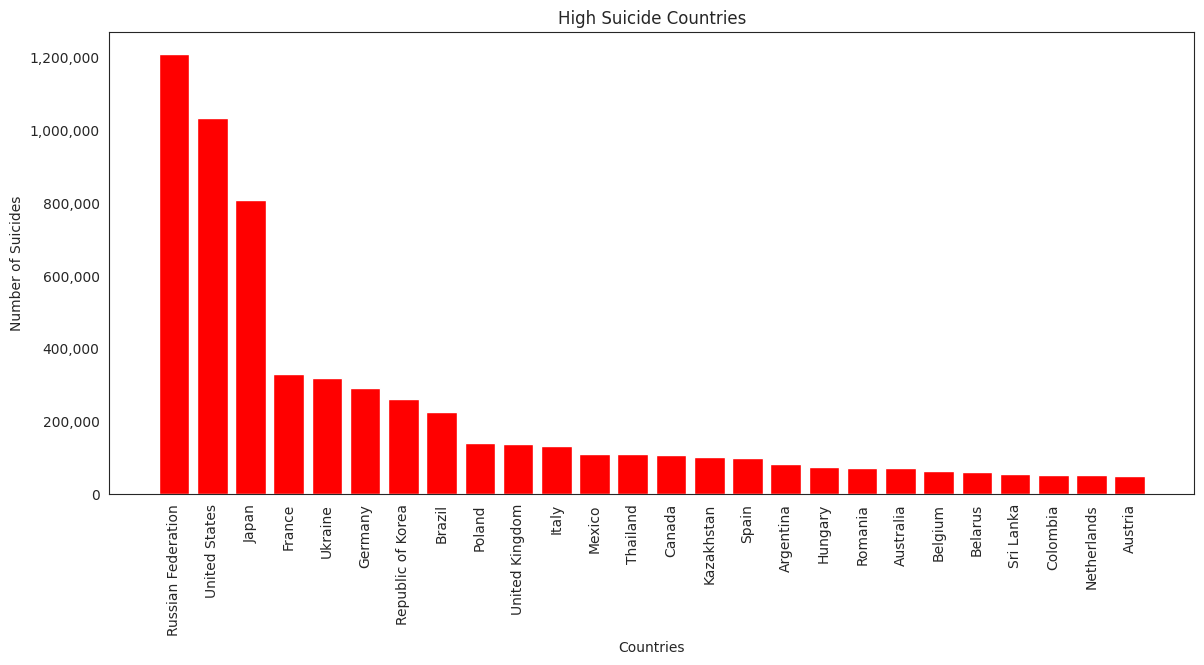

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

country_suicide_series = df.groupby('country')['suicides_no'].sum()

threshold = 50000

high_suicide = country_suicide_series[country_suicide_series > threshold].sort_values(ascending=False)
low_suicide = country_suicide_series[country_suicide_series <= threshold].sort_values(ascending=True)


plt.figure(figsize=(14,6))
plt.bar(high_suicide.index, high_suicide.values, color="red")
plt.title("High Suicide Countries")
plt.xlabel("Countries")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()



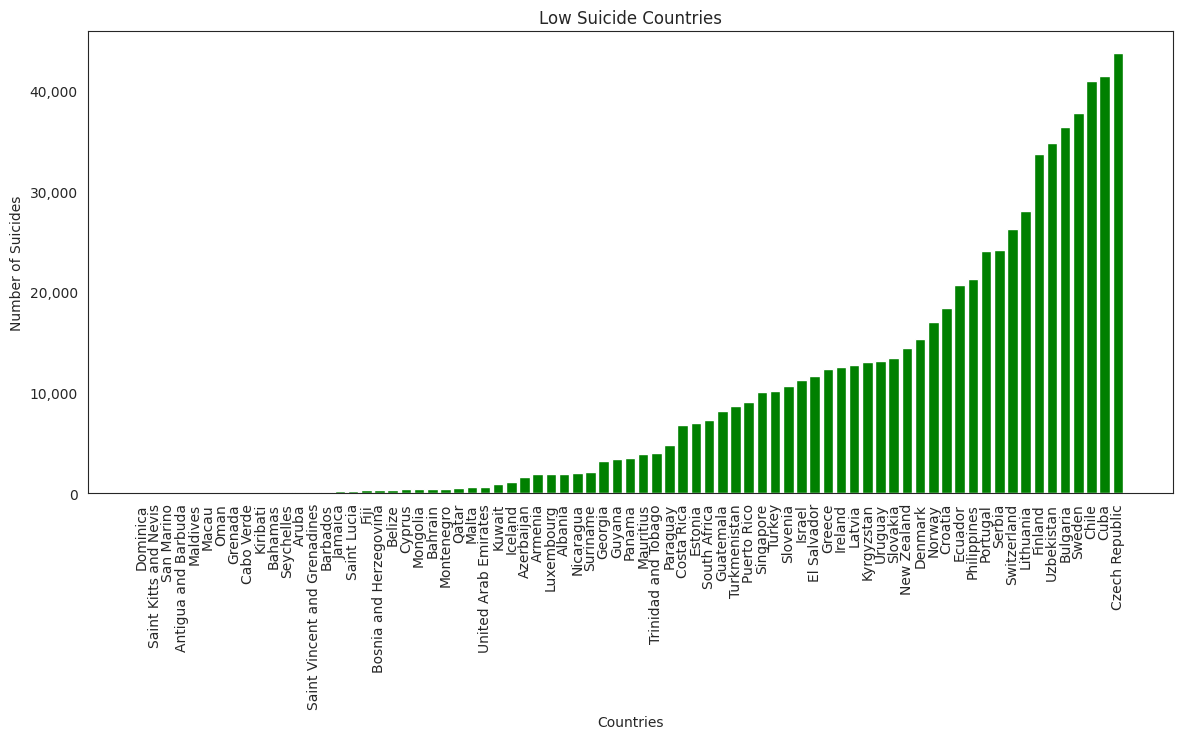

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(low_suicide.index, low_suicide.values, color="green")
plt.title("Low Suicide Countries")
plt.xlabel("Countries")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.show()


In [ ]:
df.year.unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

## Number of suicides genderwise

In [ ]:
print((df['suicides_no'][df['sex']=='male']).sum())

5188910


In [ ]:
print((df['suicides_no'][df['sex']=='female']).sum())

1559510


In [ ]:
genderwise_suicide = df.pivot_table(index='sex' , aggfunc='sum')

In [ ]:
genderwise_suicide['suicides_no']

,suicides_no
sex,
female,1559510
male,5188910


In [ ]:
df['suicides_no'].sum()

np.int64(6748420)

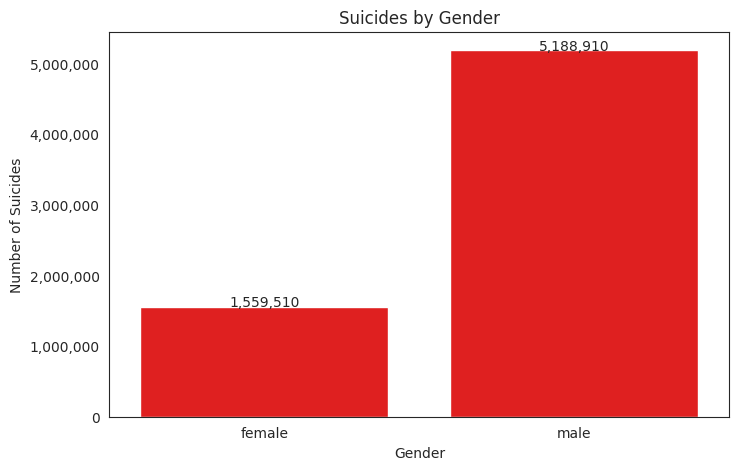

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(8,5))
sb.set_style('white')

ax = sb.barplot(x=genderwise_suicide.index, y=genderwise_suicide['suicides_no'], color='Red')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

for p in ax.patches:
    ax.text(
        x=p.get_x() + p.get_width()/2,
        y=p.get_height() + 500,
        s=f'{int(p.get_height()):,}',
        ha='center'
    )

plt.xlabel("Gender")
plt.ylabel("Number of Suicides")
plt.title("Suicides by Gender")
plt.show()


## Number of suicides genderwise in each country

In [ ]:
country_wise_gender_suicide_df = pd.DataFrame({
    'country' : df.country,
    'sex' : df.sex,
    'suicides_no' : df.suicides_no
})

In [ ]:
country_wise_gender_suicide = country_wise_gender_suicide_df.pivot_table(index='country' , columns='sex' , aggfunc='sum')

In [ ]:
country_wise_gender_suicide.iloc[0]

sex   
suicides_no  female     693
             male      1277
Name: Albania, dtype: int64

In [ ]:
country_wise_gender_suicide.columns = country_wise_gender_suicide.columns.droplevel()

In [ ]:
country_wise_gender_suicide.female.head()

,female
country,
Albania,693
Antigua and Barbuda,1
Argentina,18326
Armenia,495
Aruba,17


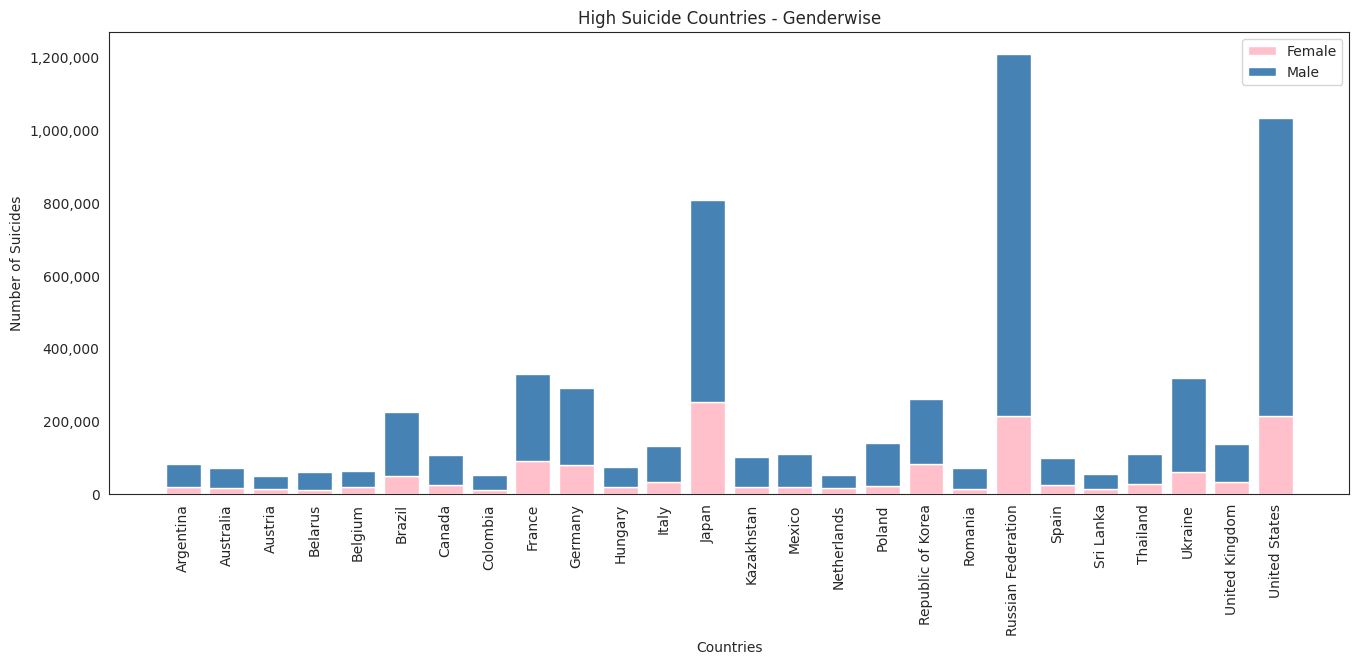

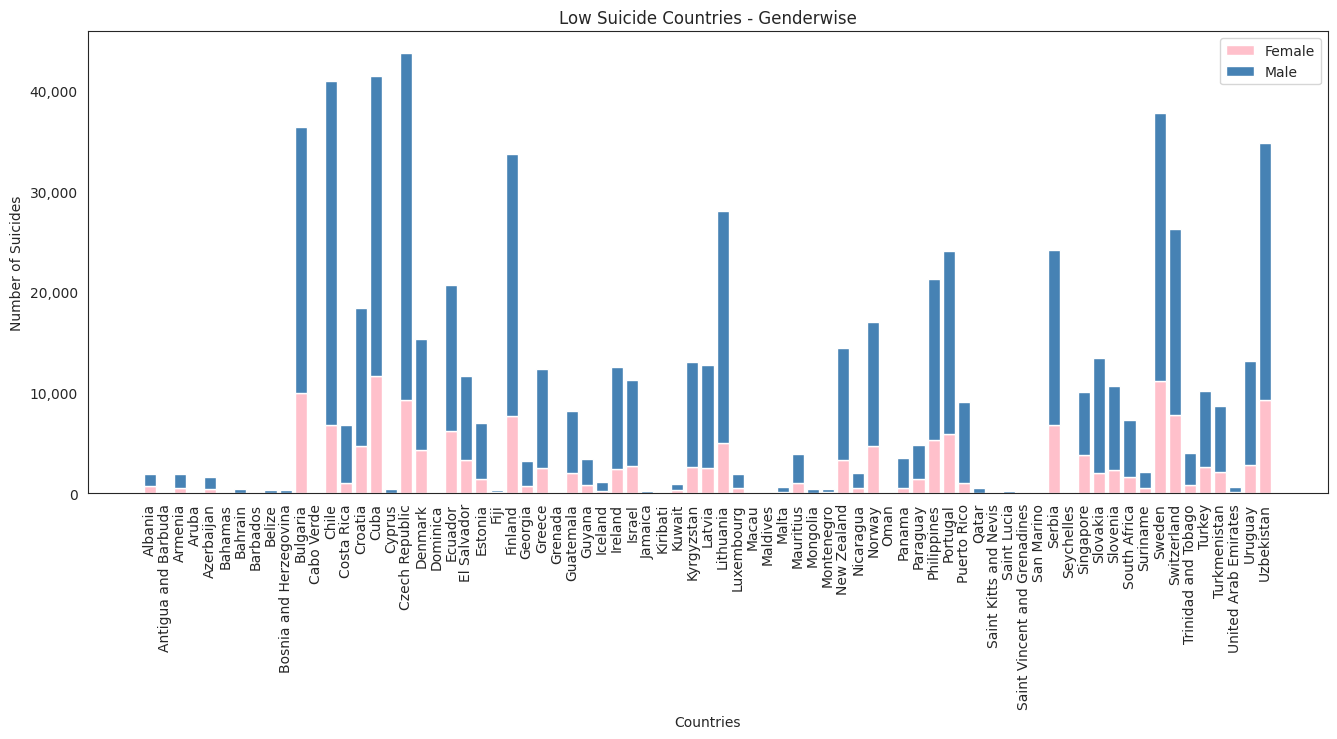

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

threshold = 50000

female = country_wise_gender_suicide['female']
male = country_wise_gender_suicide['male']
total = female + male

high_suicide = country_wise_gender_suicide[total > threshold]
low_suicide = country_wise_gender_suicide[total <= threshold]

plt.figure(figsize=(16,6))
plt.bar(high_suicide.index, high_suicide['female'], label='Female', color='pink')
plt.bar(high_suicide.index, high_suicide['male'], bottom=high_suicide['female'], label='Male', color='steelblue')
plt.title("High Suicide Countries - Genderwise")
plt.xlabel("Countries")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.bar(low_suicide.index, low_suicide['female'], label='Female', color='pink')
plt.bar(low_suicide.index, low_suicide['male'], bottom=low_suicide['female'], label='Male', color='steelblue')
plt.title("Low Suicide Countries - Genderwise")
plt.xlabel("Countries")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.legend()
plt.show()


 ## Suicides committed by various age groups

In [ ]:
df.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [ ]:
agewise_suicides = df.pivot_table(index='age' , aggfunc='sum')

In [ ]:
agewise_suicides.columns

Index(['HDI for year', 'country', 'gdp_for_year ($)', 'gdp_per_capita ($)',
       'generation', 'population', 'sex', 'suicides/100k pop', 'suicides_no',
       'year'],
      dtype='object')

In [ ]:
agewise_suicides_df = pd.DataFrame({
    'suicides_no' : agewise_suicides['suicides_no']
},index = agewise_suicides.index)

In [ ]:
agewise_suicides_df

,suicides_no
age,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


<Figure size 1000x600 with 0 Axes>

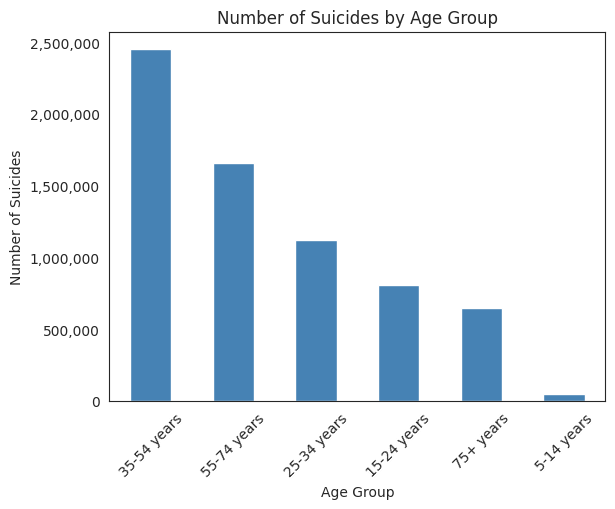

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

plt.figure(figsize=(10,6))

ax = agewise_suicides_df.sort_values(by='suicides_no', ascending=False).plot.bar(
    y='suicides_no',
    legend=False,
    color='steelblue'
)

plt.xlabel("Age Group")
plt.ylabel("Number of Suicides")
plt.title("Number of Suicides by Age Group")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))  # format y-axis


## Suicides committed by various age groups in male and female

In [ ]:
gender_agewise_suicide_df = pd.DataFrame({
    'sex' :df.sex,
    'age' : df.age,
    'suicide_no' : df.suicides_no
})

In [ ]:
gender_agewise_suicide = gender_agewise_suicide_df.pivot_table(index='age' , columns='sex' , aggfunc='sum')

In [ ]:
gender_agewise_suicide

suicide_no         
sex             female     male
age                            
15-24 years     175437   633105
25-34 years     208823   915089
35-54 years     506233  1945908
5-14 years       16997    35267
55-74 years     430036  1228407
75+ years       221984   431134

In [ ]:
gender_agewise_suicide.columns = gender_agewise_suicide.columns.droplevel()

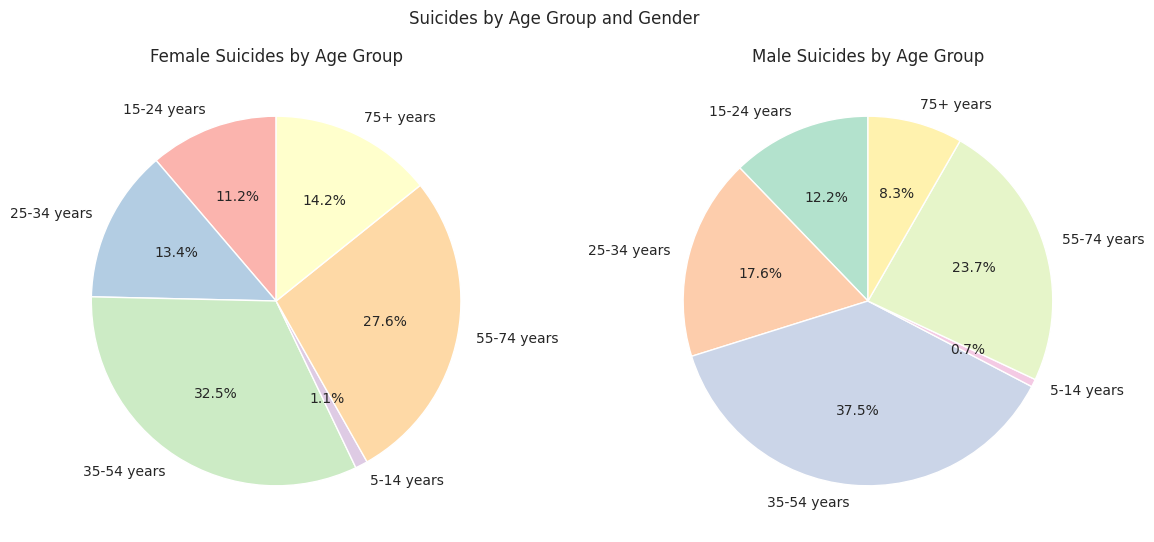

In [ ]:
female = gender_agewise_suicide['female']
male = gender_agewise_suicide['male']
ages = gender_agewise_suicide.index

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.pie(female, labels=ages, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title("Female Suicides by Age Group")

plt.subplot(1, 2, 2)
plt.pie(male, labels=ages, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel2.colors)
plt.title("Male Suicides by Age Group")

plt.suptitle("Suicides by Age Group and Gender")
plt.show()


## Suicides committed by various age groups in male and female in each country

In [ ]:
country_gender_agewise_suicide_df = pd.DataFrame({
    'country' : df.country,
    'sex' : df.sex,
    'age' : df.age,
    'suicide_no' : df.suicides_no
})

In [ ]:
country_gender_agewise_suicide_df.head()

,country,sex,age,suicide_no
0,Albania,male,15-24 years,21
1,Albania,male,35-54 years,16
2,Albania,female,15-24 years,14
3,Albania,male,75+ years,1
4,Albania,male,25-34 years,9


In [ ]:
country_gender_agewise_suicide = country_gender_agewise_suicide_df.pivot_table(index=['country' , 'age'] , columns='sex' , aggfunc='sum')

In [ ]:
country_gender_agewise_suicide.loc['Albania']

suicide_no     
sex             female male
age                        
15-24 years        253  293
25-34 years        139  288
35-54 years        173  418
5-14 years          21   40
55-74 years         68  196
75+ years           39   42

<Axes: ylabel='country,age'>

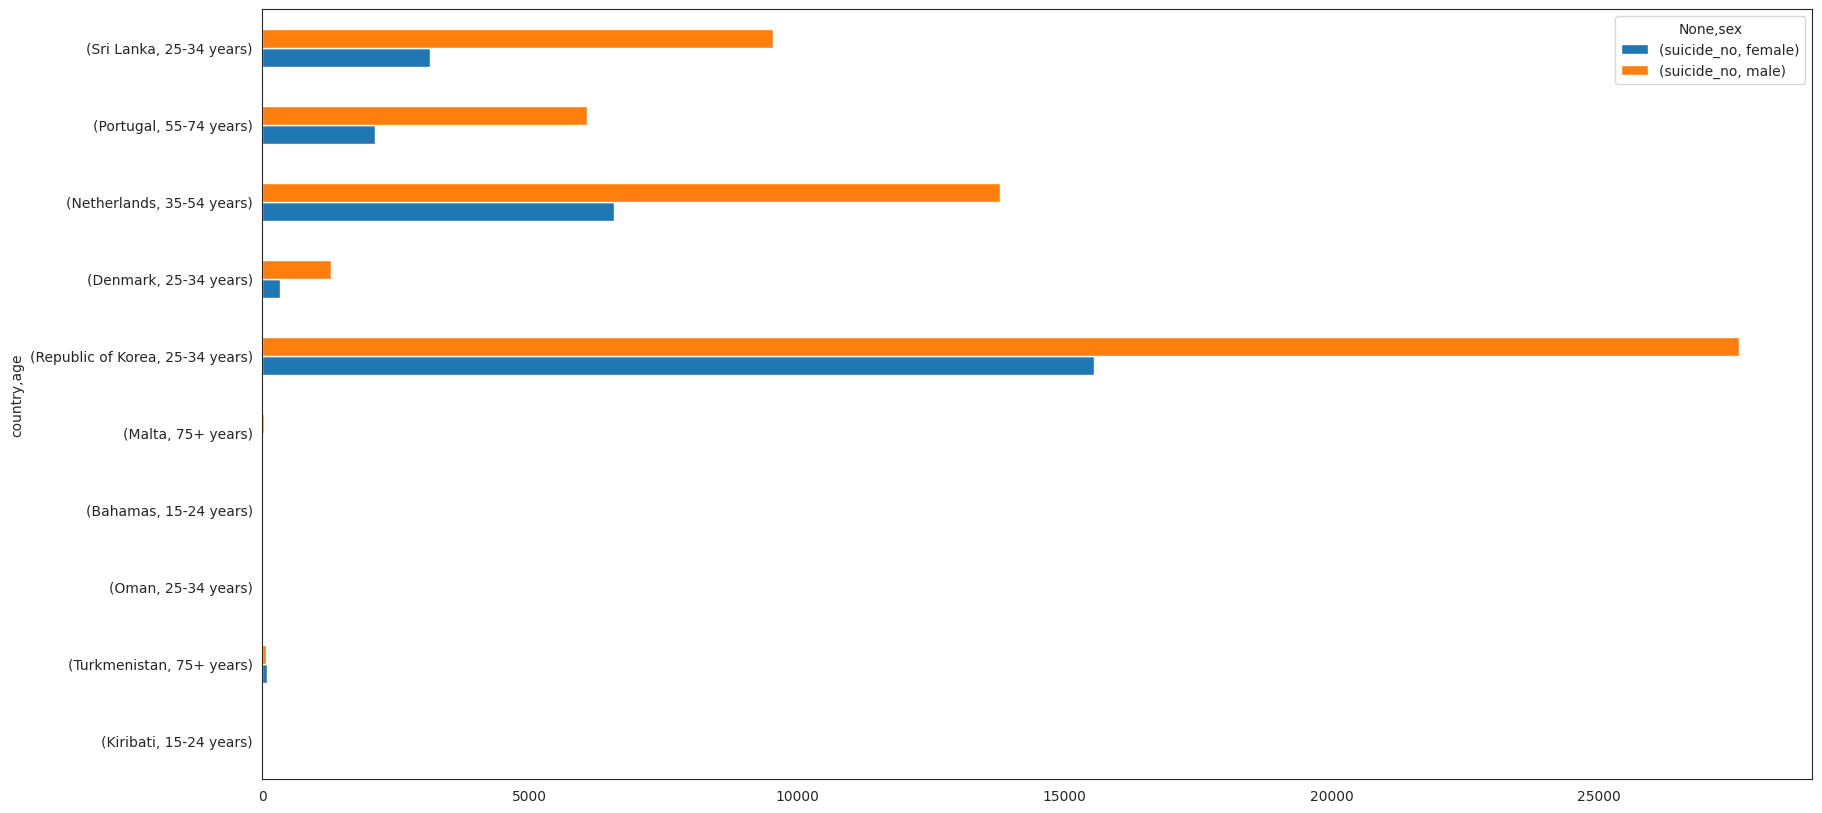

In [ ]:
country_gender_agewise_suicide.sample(10).plot.barh(figsize=(20,10))

## Population and suicide rate in yearly basics

In [ ]:
df.year.unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

In [ ]:
yearly_suicide = df.groupby('year')['suicides_no'].mean()

In [ ]:
yearly_suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
1248,Armenia,2016,male,75+ years,12,61956,19.37,NaN,"10,546,135,160",3788,Silent
1249,Armenia,2016,male,55-74 years,16,237813,6.73,NaN,"10,546,135,160",3788,Boomers
1250,Armenia,2016,male,35-54 years,16,350633,4.56,NaN,"10,546,135,160",3788,Generation X
1251,Armenia,2016,male,15-24 years,5,202220,2.47,NaN,"10,546,135,160",3788,Millenials


In [ ]:
yearly_population = pd.DataFrame({
    'population' : yearly_suicide.population
})

yearly_suicide_no = pd.DataFrame({
    'suicide_no' : yearly_suicide.suicides_no
})

In [ ]:
yearly_population.head()

,population
0,"(1985, [7709, 6344, 6173, 7339, 3778, 949, 766..."
1,"(1986, [7668, 6209, 6101, 6907, 3764, 1014, 75..."
2,"(1987, [312900, 308000, 289700, 21800, 274300,..."
3,"(1988, [36400, 319200, 22300, 314100, 140200, ..."
4,"(1989, [22500, 283600, 318400, 142100, 323500,..."


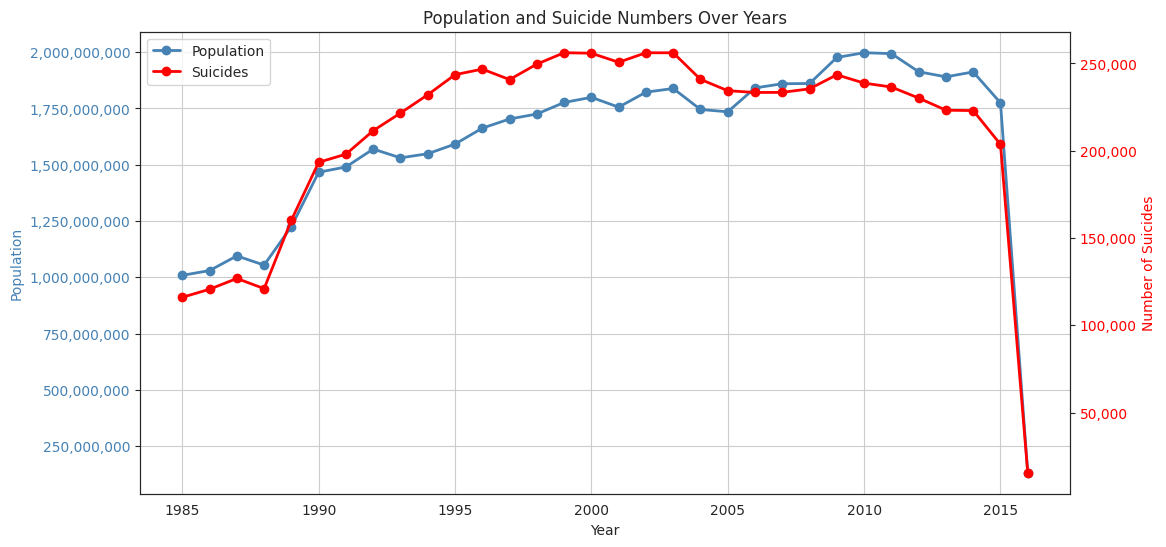

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

yearly_population = df.groupby('year')['population'].sum()
yearly_suicide_no = df.groupby('year')['suicides_no'].sum()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.plot(yearly_population.index, yearly_population.values, marker='o', color='steelblue', linewidth=2, label='Population')
ax1.set_xlabel("Year")
ax1.set_ylabel("Population", color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

ax2 = ax1.twinx()
ax2.plot(yearly_suicide_no.index, yearly_suicide_no.values, marker='o', color='red', linewidth=2, label='Suicides')
ax2.set_ylabel("Number of Suicides", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.title("Population and Suicide Numbers Over Years")
ax1.grid(True)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


## Suicide rate in male and female yearly

In [ ]:
yearly_countrywise_gender_suicide_df = pd.DataFrame({
    "year" : df.year,
    "sex" : df.sex,
    "suicides_no" : df.suicides_no
})

In [ ]:
yearly_countrywise_gender_suicide = yearly_countrywise_gender_suicide_df.pivot_table(index='year', columns='sex',aggfunc='mean')

In [ ]:
yearly_countrywise_gender_suicide.head()

suicides_no            
sex       female        male
year                        
1985  112.774306  290.222222
1986  117.541667  301.451389
1987  108.043210  283.444444
1988  112.295918  299.357143
1989  132.567308  381.035256

In [ ]:
x = yearly_countrywise_gender_suicide.index

In [ ]:
yearly_countrywise_gender_suicide.columns

MultiIndex([('suicides_no', 'female'),
            ('suicides_no',   'male')],
           names=[None, 'sex'])

In [ ]:
yearly_countrywise_gender_suicide.columns = ['female' , 'male']

In [ ]:
yearly_countrywise_gender_suicide.head()

,female,male
year,,
1985,112.774306,290.222222
1986,117.541667,301.451389
1987,108.043210,283.444444
1988,112.295918,299.357143
1989,132.567308,381.035256


In [ ]:
female = yearly_countrywise_gender_suicide['female']
male = yearly_countrywise_gender_suicide['male']

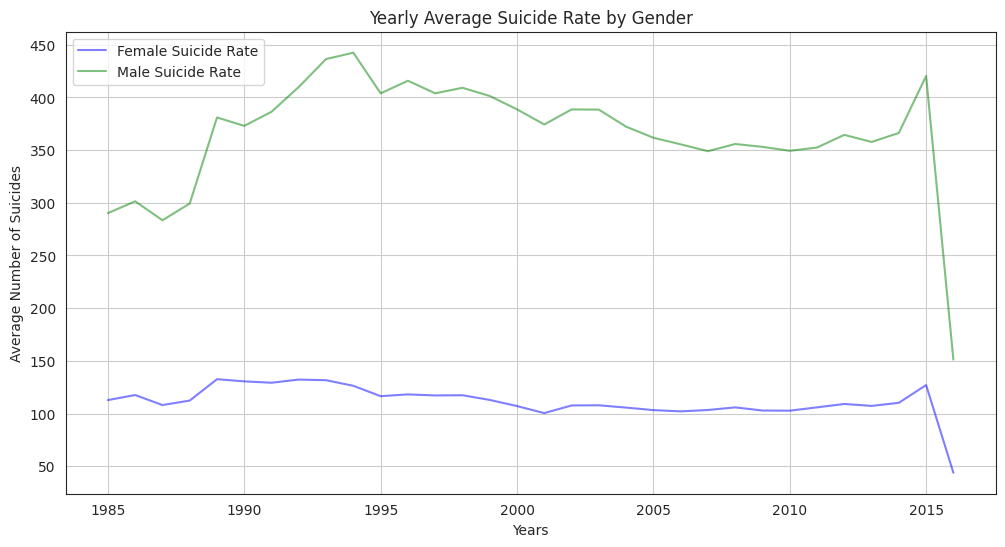

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, female, color="blue", alpha=0.5, label='Female Suicide Rate')
ax.plot(x, male, color="green", alpha=0.5, label="Male Suicide Rate")

ax.set_xlabel('Years')
ax.set_ylabel('Average Number of Suicides')
ax.set_title("Yearly Average Suicide Rate by Gender")
ax.legend()
ax.grid(True)

plt.show()


## Suicide rate over the period of time in each country


In [ ]:
country_yearwise_suicide_df  = pd.DataFrame({
    'country' : df.country,
    'year' : df.year,
    'suicides_no' : df.suicides_no
})

In [ ]:
country_yearwise_suicide = country_yearwise_suicide_df.pivot_table(index='year' , columns='country' , aggfunc='mean')

In [ ]:
country_yearwise_suicide.columns = country_yearwise_suicide.columns.droplevel()

In [ ]:
country_yearwise_suicide.head()

country,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
year,,,,,,,,,,,,,,,,,,,,,
1985,NaN,0.0,165.666667,NaN,NaN,155.083333,174.250000,NaN,0.083333,0.916667,...,248.500000,2.416667,NaN,NaN,NaN,NaN,425.416667,2453.833333,23.916667,NaN
1986,NaN,0.0,190.333333,NaN,NaN,170.333333,178.250000,NaN,NaN,NaN,...,233.166667,8.666667,NaN,NaN,NaN,NaN,403.250000,2574.333333,21.833333,NaN
1987,6.083333,0.0,190.500000,NaN,NaN,180.333333,172.416667,NaN,0.250000,0.750000,...,252.916667,9.916667,NaN,22.666667,837.500000,NaN,382.833333,2565.250000,21.500000,NaN
1988,5.250000,0.0,196.166667,NaN,NaN,181.000000,154.250000,NaN,NaN,1.166667,...,NaN,13.666667,NaN,22.500000,812.583333,NaN,414.250000,2532.333333,22.333333,NaN
1989,5.666667,0.0,187.250000,NaN,NaN,172.166667,158.166667,NaN,NaN,NaN,...,NaN,14.416667,NaN,21.083333,907.250000,NaN,363.416667,2518.166667,28.666667,NaN


In [ ]:
country_yearwise_suicide.interpolate(axis=0 , inplace=True)

In [ ]:
country_yearwise_suicide.fillna(method='bfill' , axis=0 , inplace=True)

/tmp/ipython-input-2125144401.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [ ]:
country_yearwise_suicide.iloc[:,1].name

'Antigua and Barbuda'

In [ ]:
len(country_yearwise_suicide.columns)

101

Text(0, 0.5, 'Avg. of suicide no')

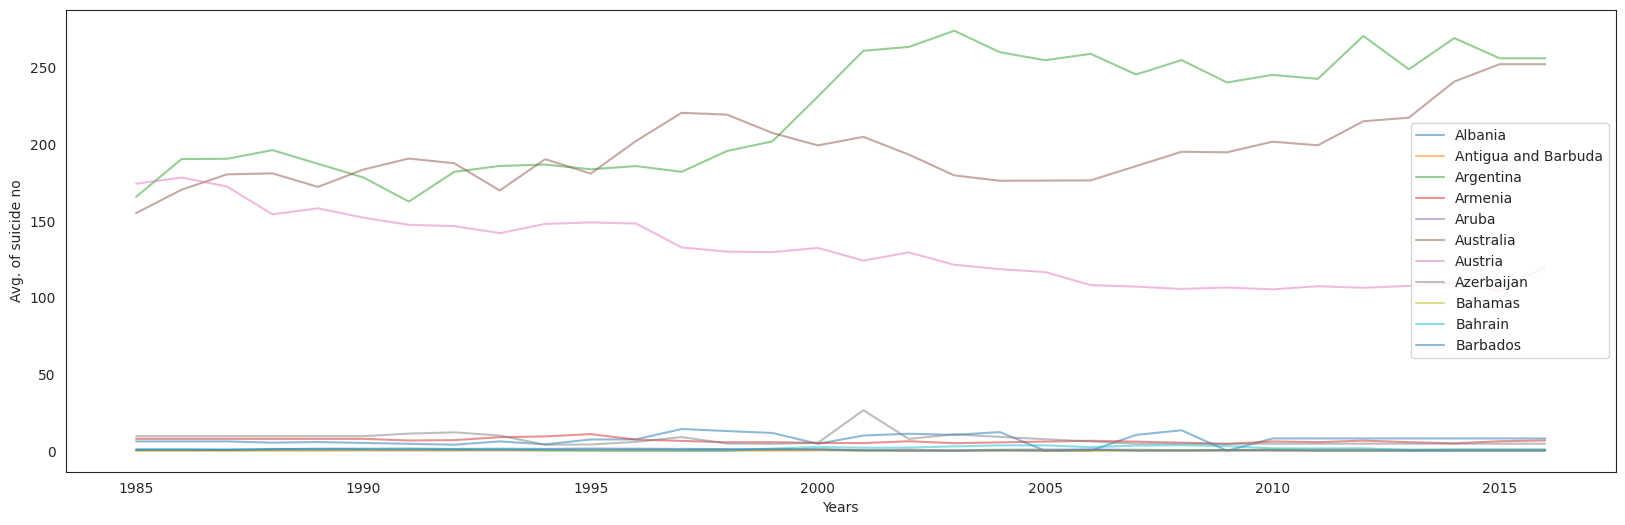

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

l = len(country_yearwise_suicide.columns)
for i in range(l - 90):

    ax.plot(country_yearwise_suicide.index, country_yearwise_suicide.iloc[:,i], alpha=0.5 , label=country_yearwise_suicide.iloc[:,i].name)

ax.legend()
ax.set_xlabel('Years')
ax.set_ylabel('Avg. of suicide no')

In [ ]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

## GDP evalution of each country yearly basis

In [ ]:
yearly_country_gdp_df = pd.DataFrame({
    'country' : df.country,
    'year' : df.year,
    'gdp' : df.iloc[:,9]
})

In [ ]:
yearly_country_gdp_df = yearly_country_gdp_df.drop_duplicates()

In [ ]:
yearly_country_gdp_df.head()

,country,year,gdp
0,Albania,1987,796
12,Albania,1988,769
24,Albania,1989,833
36,Albania,1992,251
48,Albania,1993,437


In [ ]:
yearly_country_gdp_df = yearly_country_gdp_df.set_index('country')

## Evaluation  GDP of Albania country throughout the period

In [ ]:
country_gdp = yearly_country_gdp_df[yearly_country_gdp_df.index == 'Albania']
country_gdp.head()

,year,gdp
country,,
Albania,1987,796
Albania,1988,769
Albania,1989,833
Albania,1992,251
Albania,1993,437


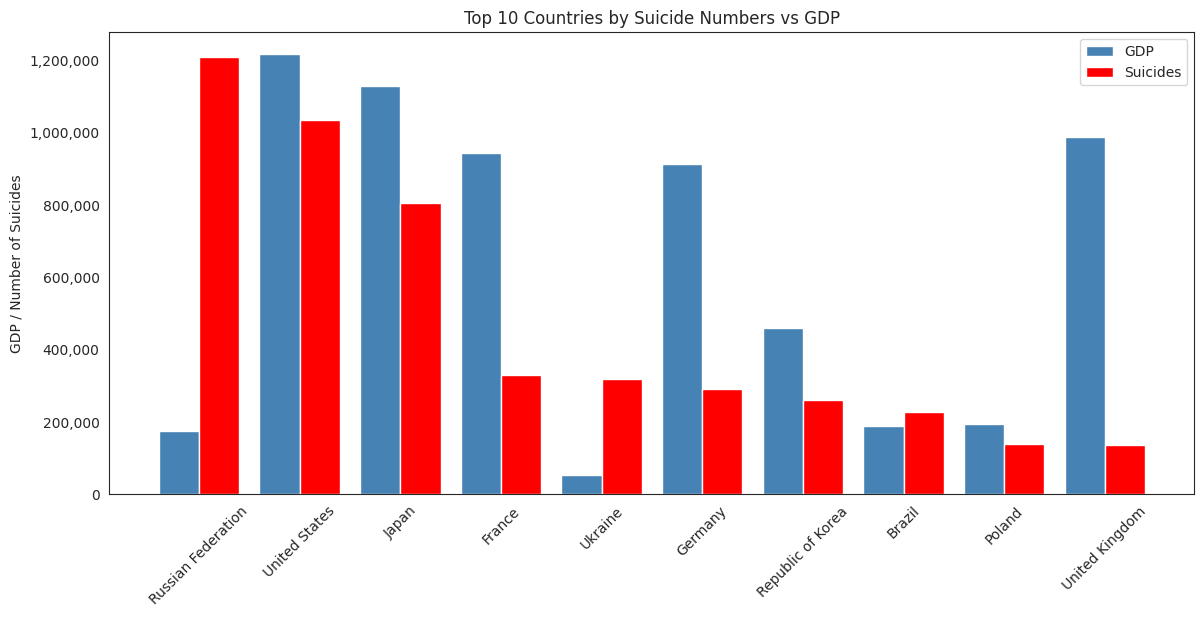

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

country_gdp = yearly_country_gdp_df.groupby("country")["gdp"].sum()
country_suicide = df.groupby("country")["suicides_no"].sum()

top_suicide_countries = country_suicide.sort_values(ascending=False).head(10)
gdp_top = country_gdp[top_suicide_countries.index]

x = np.arange(len(top_suicide_countries))
width = 0.4

fig, ax = plt.subplots(figsize=(14,6))
ax.bar(x - width/2, gdp_top, width, color='steelblue', label='GDP')
ax.bar(x + width/2, top_suicide_countries, width, color='red', label='Suicides')

ax.set_xticks(x)
ax.set_xticklabels(top_suicide_countries.index, rotation=45)
ax.set_ylabel("GDP / Number of Suicides")
ax.set_title("Top 10 Countries by Suicide Numbers vs GDP")

# Format y-axis to show integers only
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

ax.legend()
plt.show()


## Generation evaluation

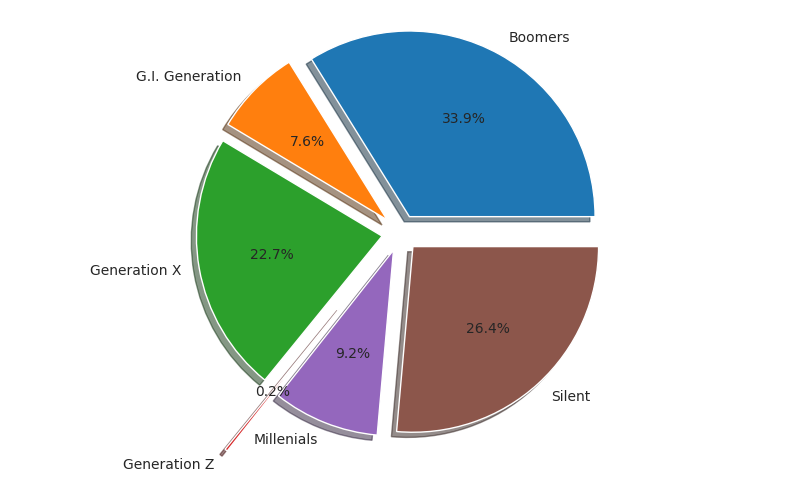

In [ ]:
gen_sui = df.pivot_table('suicides_no', index='generation', aggfunc='sum')
x = gen_sui.index.values
y = gen_sui.values
y = y.reshape(6,)

fig, ax = plt.subplots(figsize=(10, 6))
explode = (0.1,0.1,0.1,0.5,0.1,0.1)
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal')
plt.show()

## Pairplot through age group

In [ ]:
suide_pairplot = df.fillna(method='bfill')
suide_pairplot.head(2)

/tmp/ipython-input-476758829.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,0.619,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,0.619,"2,156,624,900",796,Silent


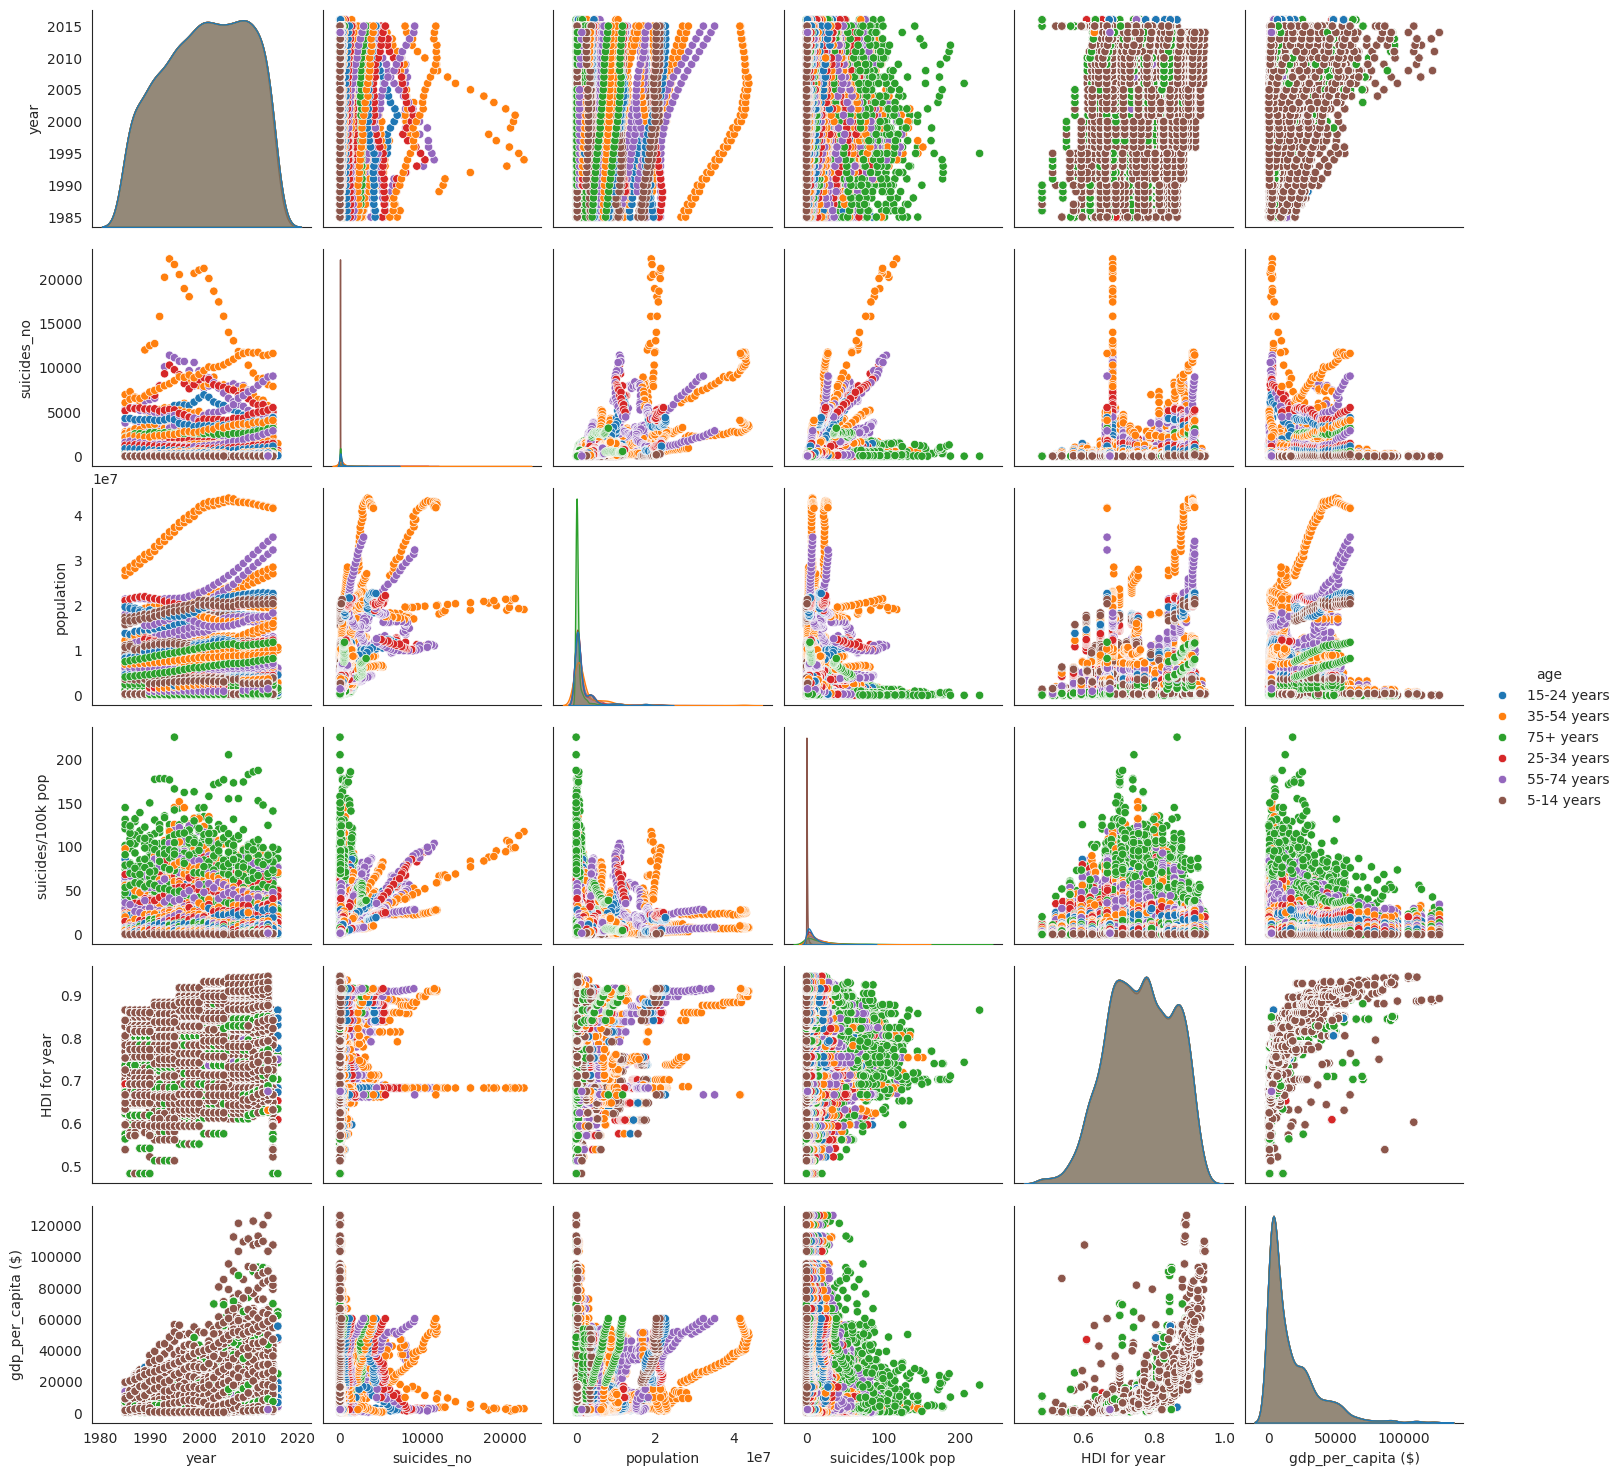

In [ ]:
sb.pairplot(suide_pairplot , hue='age')